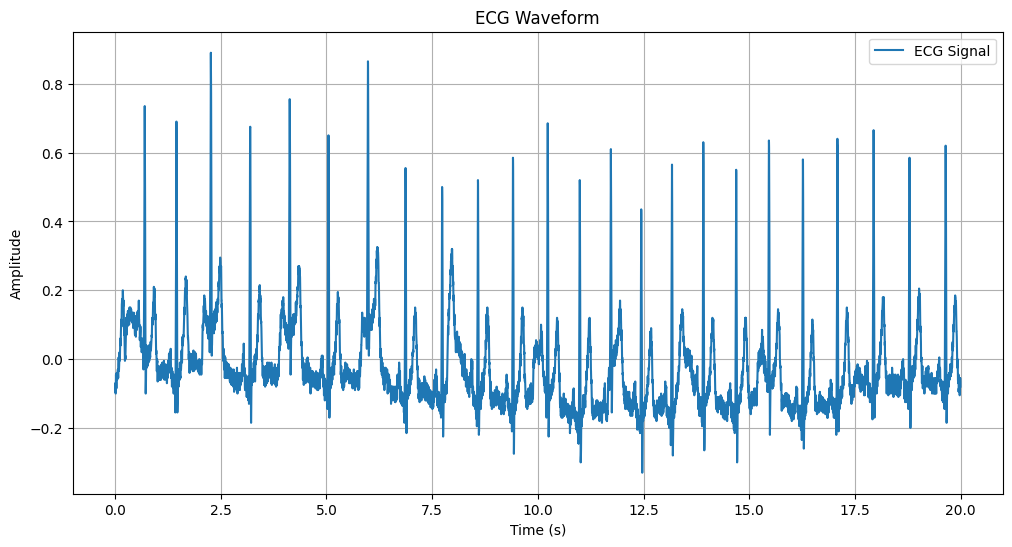

In [2]:
import wfdb
import matplotlib.pyplot as plt

# Path to the uploaded files
base_path = r"E:\Final Year Project\rec_1"

# Read the record and annotation
record = wfdb.rdrecord(base_path)
# annotation = wfdb.rdann(base_path, 'atr')

# Extract signal and time
signal = record.p_signal
sampling_rate = record.fs
time = [i / sampling_rate for i in range(len(signal))]

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(time, signal[:, 0], label="ECG Signal")  # Assuming a single lead signal
plt.title("ECG Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()



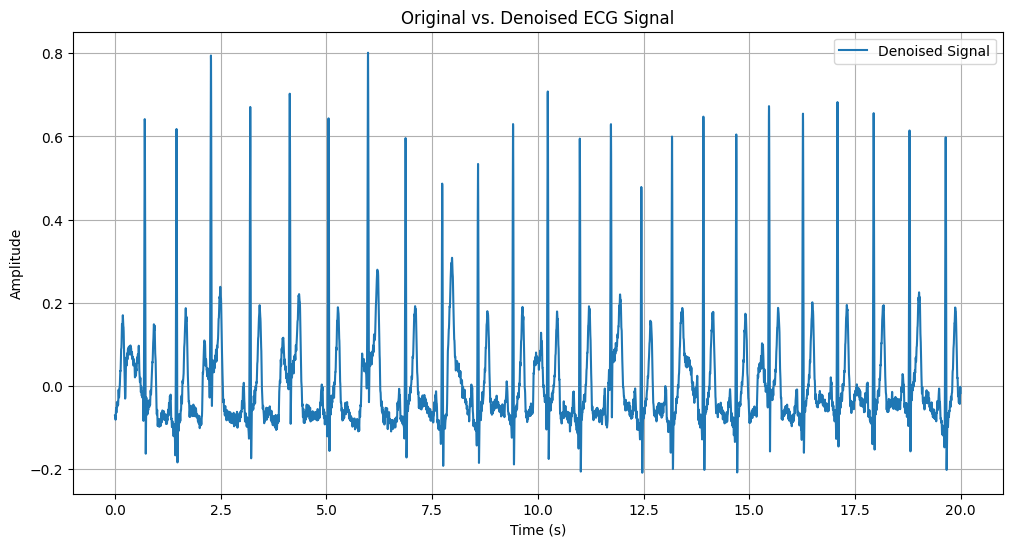

In [ ]:
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

def denoise_signal(signal, fs, lowcut=0.5, highcut=50.0, order=4):
    """
    Denoises an ECG signal using a bandpass filter.
    
    Parameters:
        signal (numpy.ndarray): The ECG signal to denoise.
        fs (float): Sampling frequency of the signal in Hz.
        lowcut (float): Lower frequency for the bandpass filter in Hz.
        highcut (float): Upper frequency for the bandpass filter in Hz.
        order (int): Order of the Butterworth filter.

    Returns:
        numpy.ndarray: The denoised ECG signal.
    """
    # Design bandpass filter
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    
    # Apply the filter
    denoised_signal = filtfilt(b, a, signal, axis=0)
    return denoised_signal

# Function to plot the denoised signal
def plot_denoised_signal(original_signal, denoised_signal, fs):
    """
    Plots the original and denoised ECG signals.

    Parameters:
        original_signal (numpy.ndarray): The original ECG signal.
        denoised_signal (numpy.ndarray): The denoised ECG signal.
        fs (float): Sampling frequency in Hz.
    """
    time = [i / fs for i in range(len(original_signal))]
    
    plt.figure(figsize=(12, 6))
    
    # Plot original signal
    # plt.plot(time, original_signal, label="Original Signal", alpha=0.7)
    
    # Plot denoised signal
    plt.plot(time, denoised_signal, label="Denoised Signal", linewidth=1.5)
    
    plt.title("Original vs. Denoised ECG Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()


# Read the record
record = wfdb.rdrecord(r"E:\Final Year Project\rec_1")
signal = record.p_signal[:, 0]  # Assuming single-lead ECG
fs = record.fs  # Sampling frequency

# Denoise the signal
denoised = denoise_signal(signal, fs)

# Plot the original and denoised signals
plot_denoised_signal(signal, denoised, fs)


In [20]:
import wfdb
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Specify the path to the .dat file (and corresponding .hea file)
file_path = r"E:\Final Year Project\rec_1"  # Replace this with your actual path

# Read the signal from the .dat file
record = wfdb.rdrecord(file_path)

# Get the signal (ECG waveform) and sampling frequency (fs)
signal = record.p_signal
fs = record.fs

# Define the Bandpass Filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

# Apply the bandpass filter to the signal (e.g., 0.5 Hz - 50 Hz for typical ECG)
lowcut = 0.5  # Low cutoff frequency (Hz)
highcut = 50  # High cutoff frequency (Hz)

# Apply the filter to the first channel of the signal (single lead ECG)
filtered_signal = bandpass_filter(signal[:, 0], lowcut, highcut, fs)

# Use NeuroKit2 to detect peaks
ecg_signal = filtered_signal  # Use the filtered ECG signal

# Extract the R-peaks using neurokit2
rpeaks, = nk.ecg_findpeaks(ecg_signal, sampling_rate=fs)

# Debugging: Check if rpeaks is a valid array
print("R-peaks array: ", rpeaks)
print("Shape of rpeaks: ", rpeaks.shape)

# Check if rpeaks is not empty before proceeding
if len(rpeaks) > 1:
    # Compute RR intervals (difference between consecutive R-peaks)
    rr_intervals = np.diff(rpeaks) / fs

    # Plot the ECG with detected peaks and feature annotations
    plt.figure(figsize=(12, 6))

    # Plot the filtered ECG signal
    plt.plot(ecg_signal, label='Filtered ECG Signal')

    # Plot detected R-peaks
    plt.scatter(rpeaks, ecg_signal[rpeaks], color='red', label='R Peaks')

    # Add legend
    plt.legend(loc='upper right')
    plt.title('ECG Signal with Detected R-Peaks')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

    # Print extracted features
    print("Extracted Features:")
    print("RR Intervals (in seconds):", rr_intervals)
else:
    print("Error: No R-peaks detected.")


R-peaks array:  ECG_R_Peaks


AttributeError: 'str' object has no attribute 'shape'